In [3]:
#순환신경망_시계열_20220502_다중채널 
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt

In [4]:
# 데이터 읽어오기
# 종가만사용했는데. .이번에는 종가 시가 고가 저가를 모두 포함해서 데이터 가져오기-->넘파이 배열 형태로
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM, Dropout
coindesk_data = pd.read_csv("https://raw.githubusercontent.com/bigdataleeky/python/main/data/BTC_USD_2019-02-28_2020-02-27-CoinDesk.csv")
coindesk_data.head()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2019-02-28,3772.936335,3796.637284,3824.165879,3666.524016
1,BTC,2019-03-01,3799.678543,3773.441461,3879.231185,3753.800022
2,BTC,2019-03-02,3811.611979,3799.367026,3840.044823,3788.918498
3,BTC,2019-03-03,3804.419170,3806.691513,3819.194356,3759.409216
4,BTC,2019-03-04,3782.664101,3807.845756,3818.695481,3766.242048


In [7]:
seq =coindesk_data.drop(columns=['Currency','Date']).to_numpy()
seq[:6]
#seq=coindesk_data[['Closing Price (USD)']].to_numpy()

array([[3772.93633533, 3796.63728431, 3824.16587937, 3666.52401643],
       [3799.67854295, 3773.44146075, 3879.23118467, 3753.80002246],
       [3811.61197937, 3799.36702601, 3840.04482307, 3788.91849833],
       [3804.41917011, 3806.69151279, 3819.19435612, 3759.40921647],
       [3782.66410112, 3807.84575592, 3818.69548135, 3766.24204823],
       [3689.86289319, 3783.35506344, 3804.35361623, 3663.47774336]])

In [8]:
def seq2dataset(seq,window,horizon):
    X=[]; Y=[]
    for i in range(len(seq)-(window+horizon)+1):
        x=seq[i:(i+window)]
        y=(seq[i+window+horizon-1])
        X.append(x); Y.append(y)
    return np.array(X), np.array(Y)

w=7 # 윈도우 크기
h=1 # 수평선 계수
X,Y=seq2dataset(seq,w,h)

In [9]:
X.shape, Y.shape

((358, 7, 4), (358, 4))

In [10]:
X[0], Y[0]

(array([[3772.93633533, 3796.63728431, 3824.16587937, 3666.52401643],
        [3799.67854295, 3773.44146075, 3879.23118467, 3753.80002246],
        [3811.61197937, 3799.36702601, 3840.04482307, 3788.91849833],
        [3804.41917011, 3806.69151279, 3819.19435612, 3759.40921647],
        [3782.66410112, 3807.84575592, 3818.69548135, 3766.24204823],
        [3689.86289319, 3783.35506344, 3804.35361623, 3663.47774336],
        [3832.08088473, 3701.04987103, 3866.71870424, 3688.69715385]]),
 array([3848.95636968, 3832.59242908, 3881.96576977, 3802.51605364]))

In [11]:
split=int(len(X)*0.7)
x_train=X[0:split]; y_train=Y[0:split]
x_test=X[split:]; y_test=Y[split:]

In [12]:
# LSTM 모델 설계와 학습
model=Sequential()
model.add(LSTM(units=128,activation='relu',input_shape=x_train[0].shape))
model.add(Dense(4))  # 출력층
model.compile(loss='mae',optimizer='adam',metrics=['mae'])
hist=model.fit(x_train,y_train,epochs=200,batch_size=1,validation_data=(x_test,y_test),verbose=2)

Epoch 1/200
250/250 - 1s - loss: 1257.4182 - mae: 1257.4182 - val_loss: 436.5840 - val_mae: 436.5840 - 1s/epoch - 6ms/step
Epoch 2/200
250/250 - 0s - loss: 755.1173 - mae: 755.1173 - val_loss: 400.6986 - val_mae: 400.6986 - 422ms/epoch - 2ms/step
Epoch 3/200
250/250 - 0s - loss: 556.8813 - mae: 556.8813 - val_loss: 324.5070 - val_mae: 324.5070 - 433ms/epoch - 2ms/step
Epoch 4/200
250/250 - 0s - loss: 512.8777 - mae: 512.8777 - val_loss: 476.7103 - val_mae: 476.7103 - 428ms/epoch - 2ms/step
Epoch 5/200
250/250 - 0s - loss: 467.9371 - mae: 467.9371 - val_loss: 346.2917 - val_mae: 346.2917 - 419ms/epoch - 2ms/step
Epoch 6/200
250/250 - 0s - loss: 521.5710 - mae: 521.5710 - val_loss: 487.4746 - val_mae: 487.4746 - 420ms/epoch - 2ms/step
Epoch 7/200
250/250 - 0s - loss: 487.6951 - mae: 487.6951 - val_loss: 320.7610 - val_mae: 320.7610 - 440ms/epoch - 2ms/step
Epoch 8/200
250/250 - 0s - loss: 477.7067 - mae: 477.7067 - val_loss: 347.9022 - val_mae: 347.9022 - 430ms/epoch - 2ms/step
Epoch 9/2

In [13]:
# LSTM모델 평가
ev= model.evaluate(x_test,y_test)
print(f"손실함수 : {ev[0]}  MAE: {ev[1]}"  )
# LSTM모델 예측
pred = model.predict(x_test)
print(f"평균 절대값 백분율 오차(MAPE) : {sum(abs(y_test-pred)/y_test)/ len(x_test)}")

4/4 [==============================] - 0s 3ms/step - loss: 136.5648 - mae: 136.5648
손실함수 : 136.56484985351562  MAE: 136.56484985351562
평균 절대값 백분율 오차(MAPE) : [0.02424921 0.00606453 0.02039466 0.01583621]


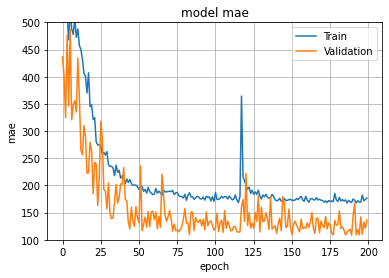

In [15]:
# 학습곡선
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title("model mae")
plt.ylabel('mae')
plt.xlabel('epoch')
plt.ylim([100,500])
plt.legend(['Train','Validation'],loc='best')
plt.grid()
plt.show()

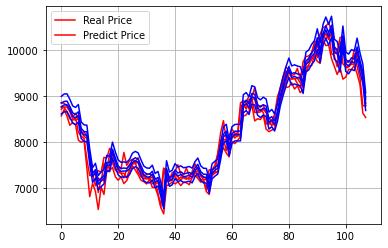

In [16]:
# 예측 결과 시각화
x_range = range(len(y_test))
x_range, y_test[x_range],y_test[:108]

plt.plot(x_range, y_test[x_range], color='red')  # 실제 시계열데이터
plt.plot(x_range, pred[x_range], color='blue')  # 가격 예측 데이터
plt.legend(['Real Price', 'Predict Price'],loc='best')
plt.grid()
plt.show()


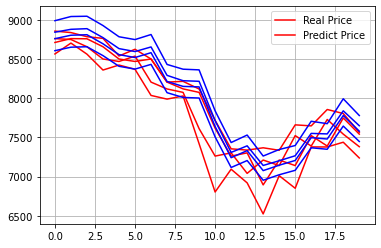

In [17]:
# 0~20 구간을 확대
x_range = range(0,20)
plt.plot(x_range, y_test[x_range], color='red')  # 실제 시계열데이터
plt.plot(x_range, pred[x_range], color='blue')  # 가격 예측 데이터
plt.legend(['Real Price', 'Predict Price'],loc='best')
plt.grid()
plt.show()

In [18]:
# LSTM 윈도우 크기만큼 데이터를 가지고 h단위로 예측
# 악보에적용 앞의 음절이나 가사를 보고 다음 음절이나 가사를 예측
# 음원의 ABC 표기법
# 도 -> C   c4  c2  c8

In [19]:
!pip install music21

In [20]:
little_star="tinynotation: 4/4 c4 c4 g4 g4 a4 a4 g2 f4 f4 e4 e4 d4 d4 c2 g4 g4 f4 f4 e4 e4 d2 g4 g4 f4 f4 e4 e4 d2 c4 c4 g4 g4 a4 a4 g2 f4 f4 e4 e4 d4 d4 c2"

In [21]:
import music21
music21.converter.parse(little_star).show('mid')

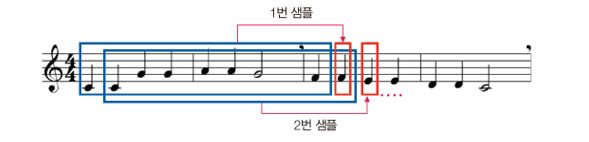

In [22]:
from IPython.display import Image
Image("https://raw.githubusercontent.com/bigdataleeky/python/main/image/84.PNG", width=500)

In [23]:
# 계이름과 숫자를 상호 변환하는 표(딕셔너리 자료구조를 사용함) - 규칙
note2num={'c':1,'d':2,'e':3,'f':4,'g':5,'a':6,'b':7}
num2note={1:'c',2:'d',3:'e',4:'f',5:'g',6:'a',7:'b'}

In [32]:
key = 'c'
note2num[key]

1

In [51]:
# ABC를 시계열로 변환
def abcToTimesSeries(s):
    note =  s.split(' ')[2:]    # 데이터를 3번째 행부터 추출 
    return [ [note2num[i[0]], int(i[1])]  for i in note ]

temp = abcToTimesSeries(little_star)
print(temp)

# 시계열 데이터를 ABC 표기로 변환(RollBack - 원상태로 돌려놓음(원상복귀))
def timesToAbcSeries(s):
    s = 'tinynotation: 4/4'
    for i in temp:
        s += ' '+ num2note[i[0]]+str(i[1])
    return s

print(timesToAbcSeries(temp)) 

[[1, 4], [1, 4], [5, 4], [5, 4], [6, 4], [6, 4], [5, 2], [4, 4], [4, 4], [3, 4], [3, 4], [2, 4], [2, 4], [1, 2], [5, 4], [5, 4], [4, 4], [4, 4], [3, 4], [3, 4], [2, 2], [5, 4], [5, 4], [4, 4], [4, 4], [3, 4], [3, 4], [2, 2], [1, 4], [1, 4], [5, 4], [5, 4], [6, 4], [6, 4], [5, 2], [4, 4], [4, 4], [3, 4], [3, 4], [2, 4], [2, 4], [1, 2]]
tinynotation: 4/4 c4 c4 g4 g4 a4 a4 g2 f4 f4 e4 e4 d4 d4 c2 g4 g4 f4 f4 e4 e4 d2 g4 g4 f4 f4 e4 e4 d2 c4 c4 g4 g4 a4 a4 g2 f4 f4 e4 e4 d4 d4 c2


In [52]:
# 레이블을 원핫 코드로 변환
# A B C
# 100  010  001
np.zeros(3)

array([0., 0., 0.])

In [74]:
# 원핫 기준코드
onehot=[[1,2],[2,2],[3,2],[4,2],[5,2],[6,2],[7,2],[1,4],[2,4],[3,4],[4,4],[5,4],[6,4],[7,4],[1,8],[2,8],[3,8],[4,8],[5,8],[6,8],[7,8]]
# t = []
# temp = [['A'],['B'],['C']]
# for i in temp:
#     a = np.zeros(len(temp))  # [0. 0. 0.]
#     a[temp.index(i)] = 1.0
#     t.append(a)
# t

def onehotMake(ydata):
    t=[]
    for i in range(len(ydata)):
        a = np.zeros(len(onehot))
        a[onehot.index(list(ydata[i]))] = 1.0
        t.append(a)
    return np.array(t)

testy = [[1, 4], [1, 4], [5, 4], [5, 4]]
onehotMake(testy)            

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.]])

In [76]:
# LSTM 형태로 데이터를 만듦
# 시계열 데이터를 윈도우 단위로 자르는 함수
def seq2dataset(seq,window,horizon):
    X=[]; Y=[]
    for i in range(len(seq)-(window+horizon)+1):
        x=seq[i:(i+window)]
        y=(seq[i+window+horizon-1])
        X.append(x); Y.append(y)
    return np.array(X), np.array(Y)

w=7 # 윈도우 크기
h=1 # 수평선 계수

seq = abcToTimesSeries(little_star)
X,Y= seq2dataset(seq,w,h)
print(X.shape, Y.shape)
print(X[0],Y[0])

(35, 7, 2) (35, 2)
[[1 4]
 [1 4]
 [5 4]
 [5 4]
 [6 4]
 [6 4]
 [5 2]] [4 4]


In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM, Dropout

In [86]:
# 예측하는게 아니라 시계열데이터를가지고 순환신경망을 구성한 답러닝인 LSTM을 이용해서 다음곡을 생성
# 목적인 생성  -> 전체데이터를 학습데이터로 처리한다. 
x_train = X
y_train = Y
y_train_onehot = onehotMake(y_train)
x_train.shape, y_train_onehot.shape 

((35, 7, 2), (35, 21))

In [89]:
# LSTM 모델 설계와 학습
from tensorflow.keras.losses import categorical_crossentropy
model=Sequential()
model.add(LSTM(units=128,activation='relu',input_shape=x_train[0].shape))
model.add(Dense(y_train.shape[1],activation="softmax"))
model.compile(loss=categorical_crossentropy,optimizer='adam',metrics=['accuracy'])
hist=model.fit(x_train,y_train,epochs=200,batch_size=1,verbose=2)

Epoch 1/200
35/35 - 1s - loss: 54.8594 - accuracy: 0.4571 - 649ms/epoch - 19ms/step
Epoch 2/200
35/35 - 0s - loss: 61696.1367 - accuracy: 0.4571 - 58ms/epoch - 2ms/step
Epoch 3/200
35/35 - 0s - loss: 7714881.0000 - accuracy: 0.4571 - 59ms/epoch - 2ms/step
Epoch 4/200
35/35 - 0s - loss: 279952672.0000 - accuracy: 0.4571 - 66ms/epoch - 2ms/step
Epoch 5/200
35/35 - 0s - loss: 4463184384.0000 - accuracy: 0.4571 - 63ms/epoch - 2ms/step
Epoch 6/200
35/35 - 0s - loss: 41328893952.0000 - accuracy: 0.4571 - 67ms/epoch - 2ms/step
Epoch 7/200
35/35 - 0s - loss: 235695423488.0000 - accuracy: 0.4571 - 55ms/epoch - 2ms/step
Epoch 8/200
35/35 - 0s - loss: 1009496621056.0000 - accuracy: 0.4571 - 58ms/epoch - 2ms/step
Epoch 9/200
35/35 - 0s - loss: 3455788253184.0000 - accuracy: 0.4571 - 61ms/epoch - 2ms/step
Epoch 10/200
35/35 - 0s - loss: 10898282381312.0000 - accuracy: 0.4571 - 57ms/epoch - 2ms/step
Epoch 11/200
35/35 - 0s - loss: 27438348238848.0000 - accuracy: 0.4571 - 62ms/epoch - 2ms/step
Epoch 

In [109]:
x_train[0], x_train[0][-w:]

(array([[1, 4],
        [1, 4],
        [5, 4],
        [5, 4],
        [6, 4],
        [6, 4],
        [5, 2]]),
 array([[1, 4],
        [1, 4],
        [5, 4],
        [5, 4],
        [6, 4],
        [6, 4],
        [5, 2]]))

In [104]:
x_train[:5].shape
model.predict(x_train[:7])

array([[nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan],
       [nan, nan]], dtype=float32)